### Documentation - https://docs.google.com/document/d/1OPZEJppqSSBqnfmWagRSvidu4vgq8iEWnEsCAyya7h4/edit?usp=sharing

In [829]:
import pandas as pd
pd.set_option('display.max_column',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [830]:
data = pd.read_csv('/content/drive/MyDrive/financial_anomaly_data.csv')

In [831]:
data.head()

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [832]:
# from google.colab import drive
# drive.mount('/content/drive')

In [833]:
# df.loc[3001]

In [834]:
data.isnull().sum()

Timestamp          481
TransactionID      481
AccountID          481
Amount             481
Merchant           481
TransactionType    481
Location           481
dtype: int64

In [835]:
data[data.isnull().any(axis=1)]

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
216960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
217436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217439,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [836]:
data.dropna(inplace=True)

In [837]:
data.shape

(216960, 7)

In [838]:
df = data.copy()

# Tracking Unusual Amounts

In [839]:
df.describe()

,Amount
count,216960.000000
mean,50090.025108
std,29097.905016
min,10.510000
25%,25061.242500
50%,50183.980000
75%,75080.460000
max,978942.260000


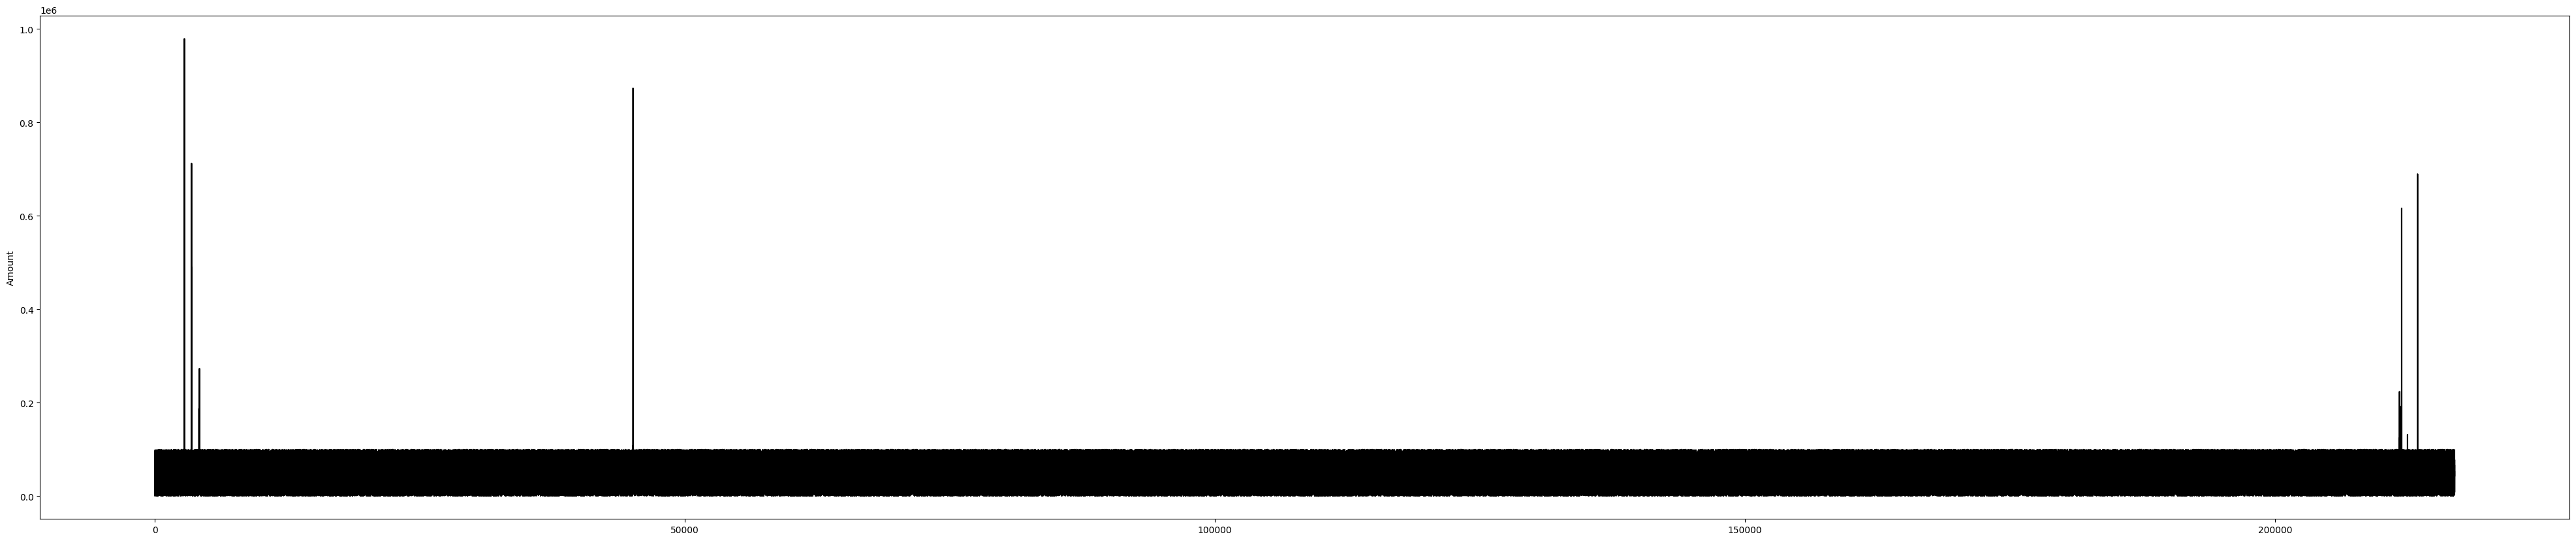

In [840]:
plt.figure(figsize=(50, 10))
plt.plot(df['Amount'],color='black')
plt.ylabel('Amount')
plt.show()

In [841]:
mean_amount = df['Amount'].mean()
std_amount = df['Amount'].std()

df['Z_Score'] = (df['Amount'] - mean_amount) / std_amount

threshold = 3

outliers = df[abs(df['Z_Score']) > threshold]
outliers

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,Z_Score
2775,03-01-2023 06:15,TXN1049,ACC14,978942.26,MerchantJ,Transfer,New York,31.921619
3448,03-01-2023 17:28,TXN827,ACC12,712076.97,MerchantA,Withdrawal,Tokyo,22.750330
3453,03-01-2023 17:33,TXN1690,ACC8,489492.30,MerchantF,Purchase,Tokyo,15.100822
4148,04-01-2023 05:08,TXN625,ACC1,187344.37,MerchantD,Purchase,San Francisco,4.716984
4194,04-01-2023 05:54,TXN667,ACC3,272990.11,MerchantE,Transfer,Los Angeles,7.660348
45099,01-02-2023 15:39,TXN1359,ACC11,151020.55,MerchantB,Transfer,Tokyo,3.468653
45100,01-02-2023 15:40,TXN190,ACC5,873004.79,MerchantI,Withdrawal,Los Angeles,28.280894
211753,28-05-2023 09:13,TXN141,ACC4,223542.64,MerchantG,Withdrawal,San Francisco,5.961000
211866,28-05-2023 11:06,TXN543,ACC2,191561.95,MerchantJ,Purchase,San Francisco,4.861928
211959,28-05-2023 12:39,TXN1359,ACC8,616155.70,MerchantC,Purchase,New York,19.453829


In [842]:
for index, rows in outliers.iterrows():
  data.loc[index, 'status'] = 1

In [843]:
df.drop('Z_Score', axis=1, inplace=True)

In [844]:
for index, rows in df.iterrows():
    if df['Amount'].loc[index] <= 1000 :
        df.loc[index, 'Transaction_bracket'] = '<1000'
    elif df['Amount'].loc[index] > 1000 and df['Amount'].loc[index] <= 25000 :
        df.loc[index, 'Transaction_bracket'] = '1000-25000'
    elif df['Amount'].loc[index] > 25000 and df['Amount'].loc[index] <= 50000 :
        df.loc[index, 'Transaction_bracket'] = '25000-50000'
    elif df['Amount'].loc[index] > 50000 and df['Amount'].loc[index] <= 75000 :
        df.loc[index, 'Transaction_bracket'] = '50000-75000'
    elif df['Amount'].loc[index] > 75000 and df['Amount'].loc[index] <= 100000 :
        df.loc[index, 'Transaction_bracket'] = '75000-100000'
    else:
        df.loc[index, 'Transaction_bracket'] = '>100000'

Transaction_bracket = df['Transaction_bracket']
Transaction_bracket = Transaction_bracket.reset_index(drop=True)

In [845]:
df['Transaction_bracket'].value_counts()

50000-75000     54479
75000-100000    54401
25000-50000     53955
1000-25000      51966
<1000            2145
>100000            14
Name: Transaction_bracket, dtype: int64

In [846]:
print('Total number of unique Accounts are : ',len(df['AccountID'].unique()))
print('Total number of unique Merchants are : ',len(df['Merchant'].unique()))
print('Types of transaction : ',df['TransactionType'].unique())
print('Cities : ',df['Location'].unique())

Total number of unique Accounts are :  15
Total number of unique Merchants are :  10
Types of transaction :  ['Purchase' 'Withdrawal' 'Transfer']
Cities :  ['Tokyo' 'London' 'Los Angeles' 'San Francisco' 'New York']


# Tracking Unusal Account and Merchant transactions

In [847]:
Acc_and_Merc = {'AccountID': [],
                'Merchant': []}

for account in df['AccountID'].unique():
  for merchant in df['Merchant'].unique():
    Acc_and_Merc['AccountID'].append(account)
    Acc_and_Merc['Merchant'].append(merchant)

Acc_and_Merc = pd.DataFrame(Acc_and_Merc)
Acc_and_Merc

for index, rows in Acc_and_Merc.iterrows():

  condition = (df['AccountID'] == rows['AccountID']) & (df['Merchant'] == rows['Merchant']) & (df['Amount']>10000)
  temp_data = df.loc[condition, 'Amount']

  Acc_and_Merc.loc[index, 'count'] = len(temp_data)
  Acc_and_Merc.loc[index, 'mean'] = temp_data.mean()
  Acc_and_Merc.loc[index, 'median'] = temp_data.median()
  Acc_and_Merc.loc[index, 'max'] = temp_data.max()
  Acc_and_Merc.loc[index, 'min'] = temp_data.min()

Acc_and_Merc

,AccountID,Merchant,count,mean,median,max,min
0,ACC4,MerchantH,1293.0,54189.160843,53807.830,99966.00,10009.85
1,ACC4,MerchantE,1285.0,54395.577541,53868.920,99899.58,10066.65
2,ACC4,MerchantI,1341.0,55405.946167,55665.980,99970.35,10196.77
3,ACC4,MerchantC,1200.0,52839.969175,51714.780,99840.45,10012.02
4,ACC4,MerchantD,1304.0,55454.690000,56301.095,99976.11,10031.62
...,...,...,...,...,...,...,...
145,ACC13,MerchantB,1327.0,55807.876805,55933.530,99798.83,10100.13
146,ACC13,MerchantJ,1307.0,55349.118753,56264.690,99916.14,10131.01
147,ACC13,MerchantA,1256.0,55338.832444,56731.490,99962.27,10101.97
148,ACC13,MerchantG,1299.0,55273.616875,55045.750,99928.03,10004.53


In [848]:
Acc_and_Merc.describe()

,count,mean,median,max,min
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1302.060000,55086.043931,55162.021367,124952.615067,10072.523600
std,33.707233,685.092148,1213.252176,119698.694743,70.965144
min,1200.000000,52839.969175,51714.780000,99683.130000,10000.740000
25%,1281.500000,54613.368355,54268.867500,99912.350000,10021.137500
50%,1304.000000,55105.207349,55161.285000,99956.000000,10052.090000
75%,1325.000000,55514.431548,56143.622500,99979.130000,10098.757500
max,1389.000000,56619.168455,58103.335000,978942.260000,10433.640000


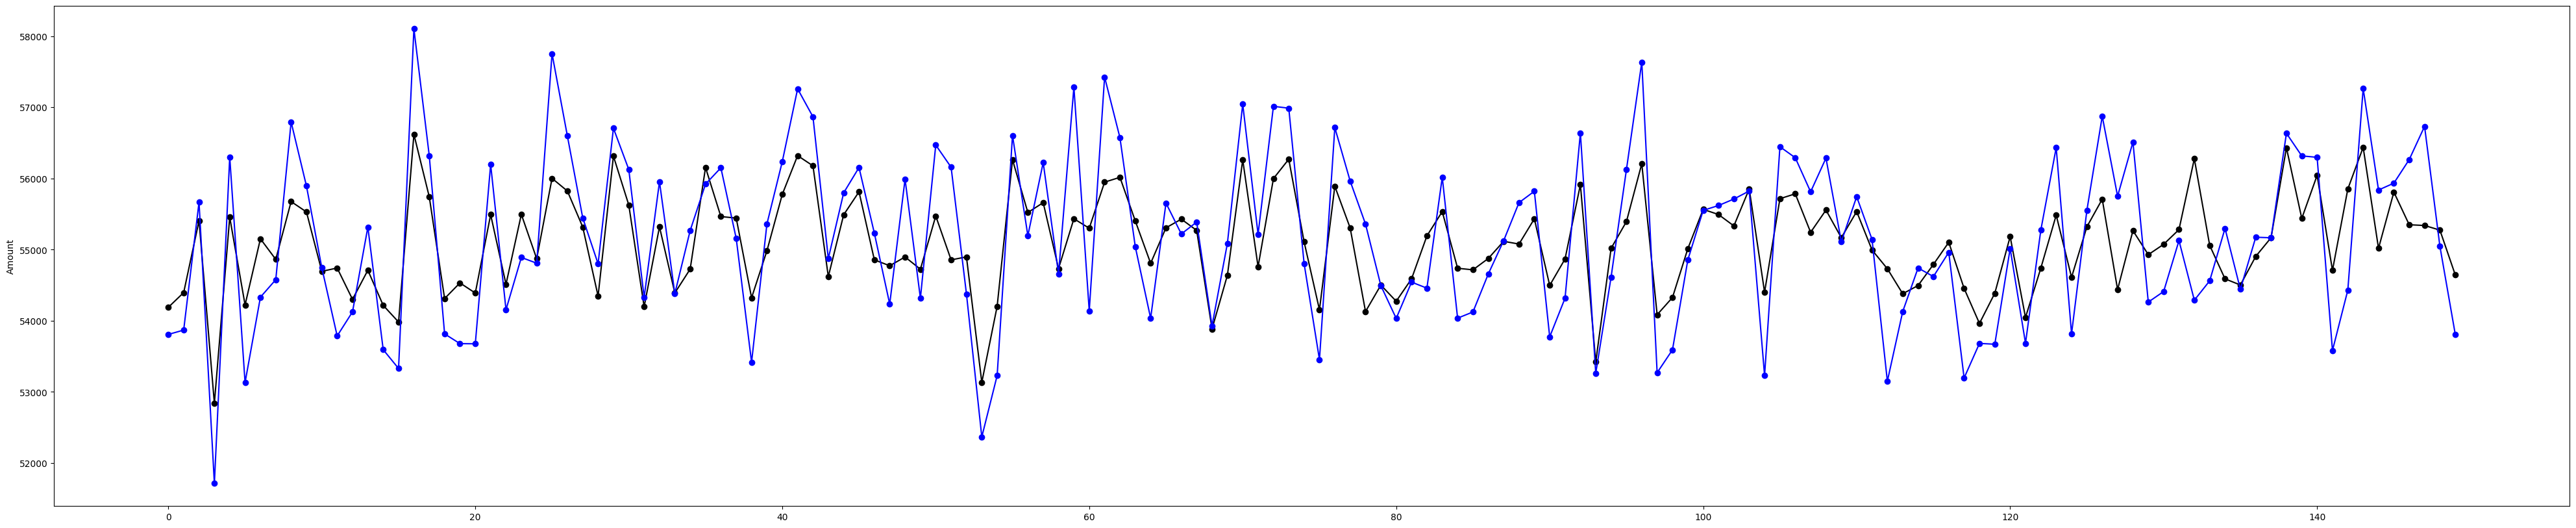

In [849]:
plt.figure(figsize=(50, 10))

plt.plot(Acc_and_Merc['mean'],marker='o',linestyle='-',color='black')
plt.plot(Acc_and_Merc['median'],marker='o',linestyle='-',color='blue')
plt.ylabel('Amount')
plt.show()

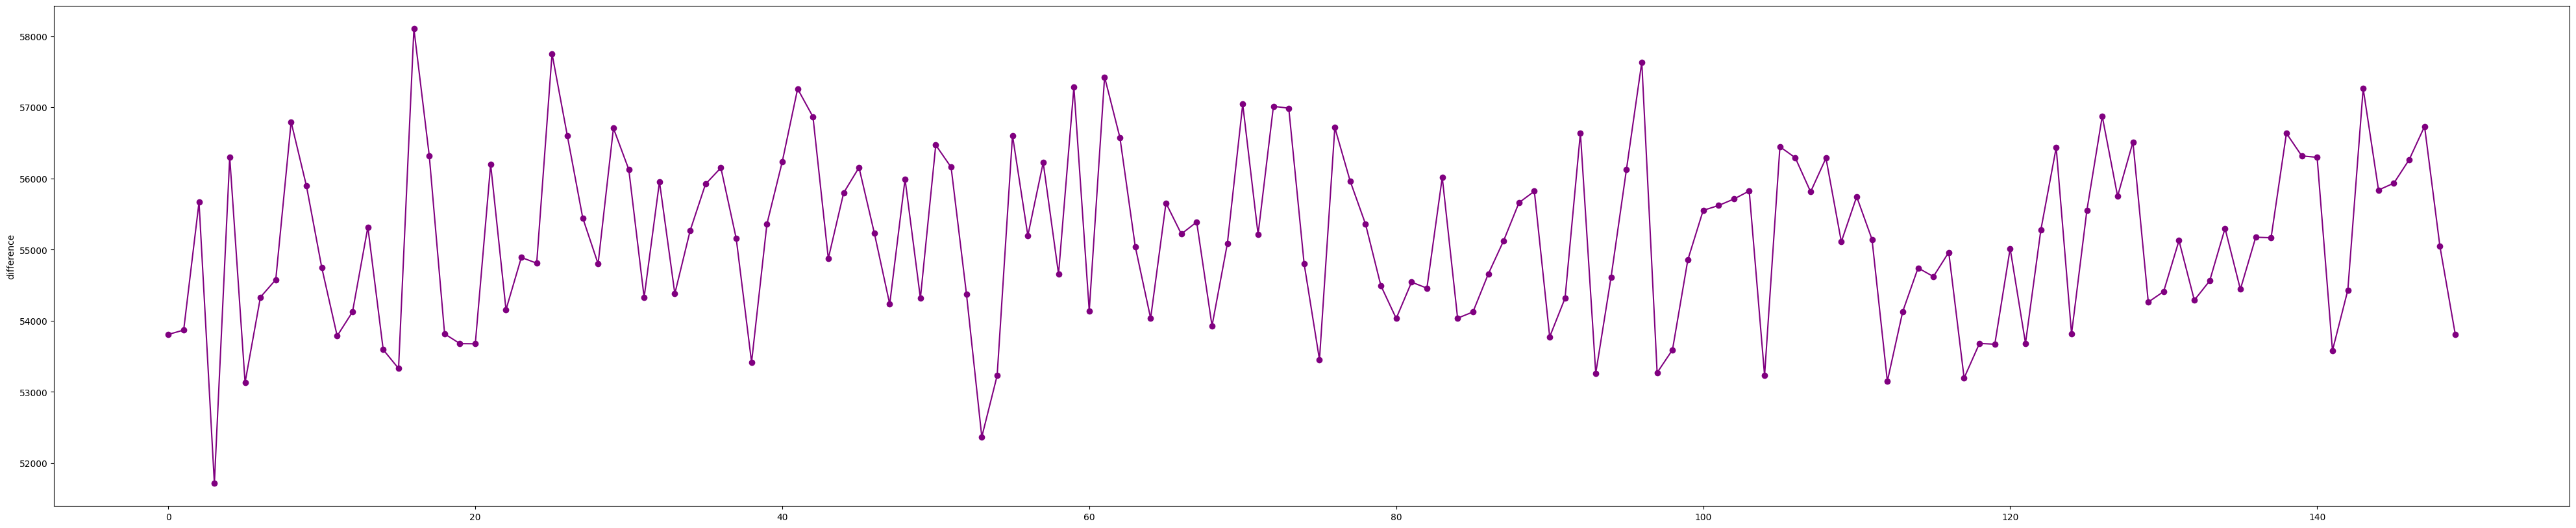

In [850]:
diff = []
difference = []

for index, row in Acc_and_Merc.iterrows():
  range = row['mean']-row['median']
  difference.append(range)
  if range > 0:
    diff.append(index)

plt.figure(figsize=(50, 10))
plt.plot(Acc_and_Merc['median'],marker='o',linestyle='-',color='purple')
plt.ylabel('difference')
plt.show()

In [851]:
Acc_and_Merc.loc[diff]

,AccountID,Merchant,count,mean,median,max,min
0,ACC4,MerchantH,1293.0,54189.160843,53807.830,99966.00,10009.85
1,ACC4,MerchantE,1285.0,54395.577541,53868.920,99899.58,10066.65
3,ACC4,MerchantC,1200.0,52839.969175,51714.780,99840.45,10012.02
5,ACC4,MerchantB,1303.0,54222.045986,53131.400,99974.46,10085.31
6,ACC4,MerchantJ,1278.0,55151.657473,54331.350,99968.85,10051.85
...,...,...,...,...,...,...,...
137,ACC5,MerchantA,1273.0,55167.028900,55166.270,99854.00,10035.81
141,ACC13,MerchantE,1283.0,54707.895027,53581.640,99937.74,10020.60
142,ACC13,MerchantI,1308.0,55851.500275,54430.445,99996.00,10006.99
148,ACC13,MerchantG,1299.0,55273.616875,55045.750,99928.03,10004.53


In [852]:
outliers = []

for index, rows in Acc_and_Merc.iterrows():
    temp = df[(df['AccountID'] == rows['AccountID']) & (df['Merchant'] == rows['Merchant']) & (df['Amount'] > 1.65 * rows['mean'])]

    for ind, row in Acc_and_Merc.iterrows():
      data.loc[ind, 'status'] = 1

# Tracking Unusual Location and transaction Type

In [853]:
print(df['Location'].unique())
print(df['TransactionType'].unique())

['Tokyo' 'London' 'Los Angeles' 'San Francisco' 'New York']
['Purchase' 'Withdrawal' 'Transfer']


In [854]:
Loc_and_Tran = {'Location': [],
                'Transaction_type': []}

for location in df['Location'].unique():
  for trans in df['TransactionType'].unique():
    Loc_and_Tran['Location'].append(location)
    Loc_and_Tran['Transaction_type'].append(trans)

Loc_and_Tran = pd.DataFrame(Loc_and_Tran)

for index, rows in Loc_and_Tran.iterrows():

  condition = (df['Location'] == rows['Location']) & (df['TransactionType'] == rows['Transaction_type'])
  temp_data = df.loc[condition, 'Amount']

  Loc_and_Tran.loc[index, 'count'] = len(temp_data)
  Loc_and_Tran.loc[index, 'mean'] = temp_data.mean()
  Loc_and_Tran.loc[index, 'median'] = temp_data.median()
  Loc_and_Tran.loc[index, 'max'] = temp_data.max()
  Loc_and_Tran.loc[index, 'min'] = temp_data.min()

Loc_and_Tran

,Location,Transaction_type,count,mean,median,max,min
0,Tokyo,Purchase,14506.0,50626.227111,50832.750,489492.30,29.74
1,Tokyo,Withdrawal,14345.0,50059.023248,50471.330,712076.97,11.16
2,Tokyo,Transfer,14440.0,49876.957151,49826.450,151020.55,22.88
3,London,Purchase,14385.0,50016.981543,50408.900,99997.50,10.51
4,London,Withdrawal,14305.0,50113.832122,49900.230,109150.02,12.90
5,London,Transfer,14653.0,50082.387220,50396.460,99998.81,11.67
6,Los Angeles,Purchase,14411.0,49787.408246,49828.030,99981.20,10.85
7,Los Angeles,Withdrawal,14344.0,50029.242230,49976.345,873004.79,10.70
8,Los Angeles,Transfer,14580.0,50092.398491,50526.385,272990.11,14.49
9,San Francisco,Purchase,14488.0,50075.502177,49456.095,689504.90,13.09


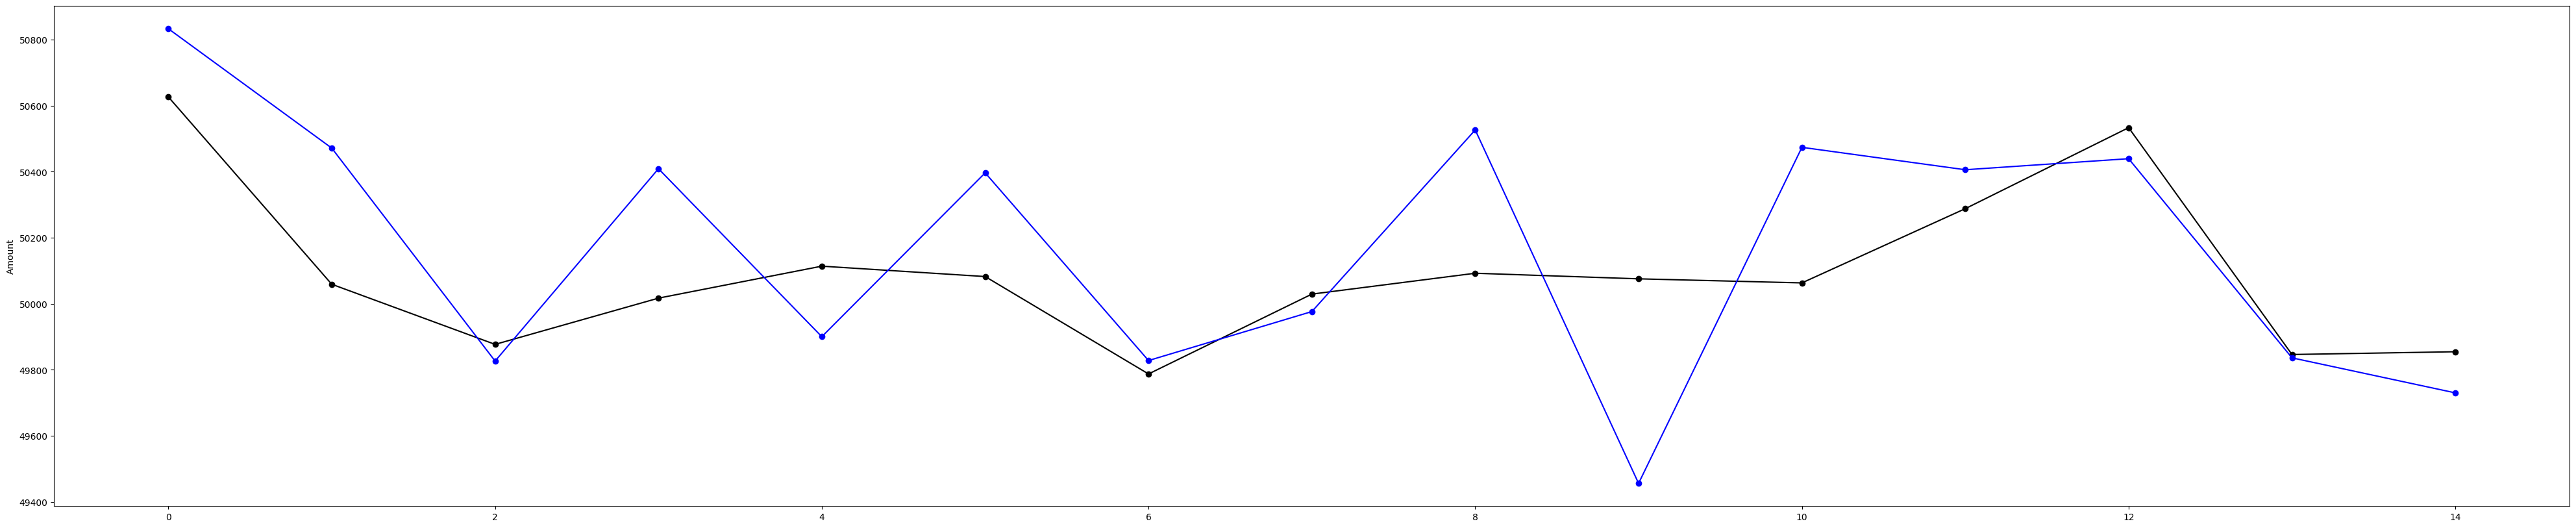

In [855]:
plt.figure(figsize=(50, 10))

plt.plot(Loc_and_Tran['mean'],marker='o',linestyle='-',color='black')
plt.plot(Loc_and_Tran['median'],marker='o',linestyle='-',color='blue')
plt.ylabel('Amount')
plt.show()

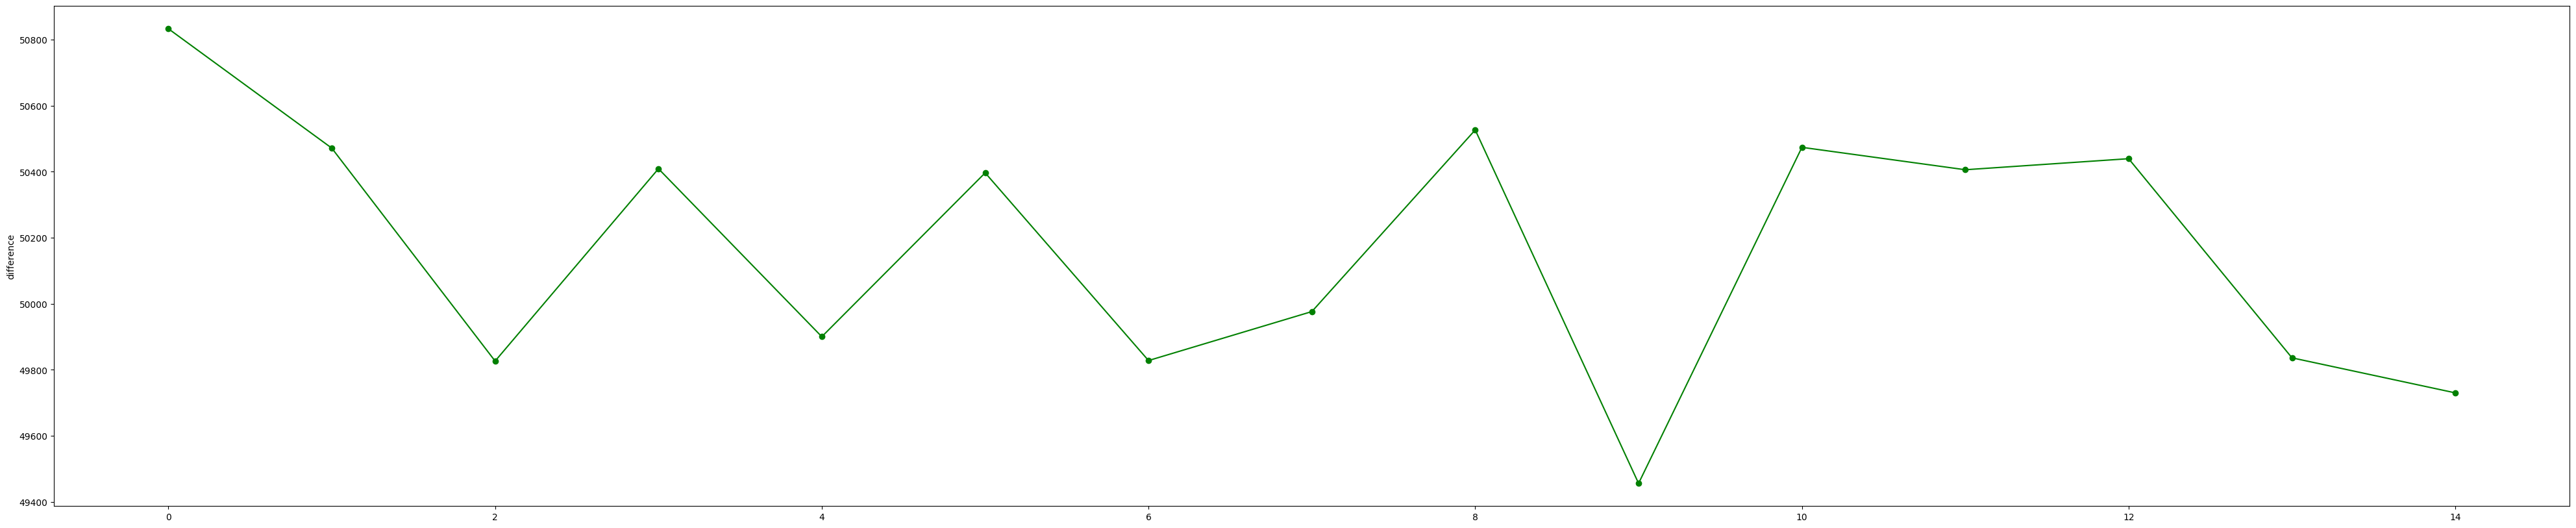

In [856]:
diff = []
difference = []

for index, row in Loc_and_Tran.iterrows():
  range = row['mean']-row['median']
  difference.append(range)
  if range > 100:
    diff.append(index)

plt.figure(figsize=(50, 10))
plt.plot(Loc_and_Tran['median'],marker='o',linestyle='-',color='green')
plt.ylabel('difference')
plt.show()

In [857]:
Loc_and_Tran.loc[diff]

,Location,Transaction_type,count,mean,median,max,min
4,London,Withdrawal,14305.0,50113.832122,49900.230,109150.02,12.90
9,San Francisco,Purchase,14488.0,50075.502177,49456.095,689504.90,13.09
14,New York,Transfer,14510.0,49854.678866,49730.135,978942.26,21.31


In [858]:
outliers = []

for index, rows in Loc_and_Tran.iterrows():
    temp = df[(df['Location'] == rows['Location']) & (df['TransactionType'] == rows['Transaction_type']) & (df['Amount'] > 1.65 * rows['mean'])]

    for ind, row in Acc_and_Merc.iterrows():
      data.loc[ind, 'status'] = 1

# Tracking abnormal transactions in a duration

In [859]:
for index, row in df.iterrows():
    Timestamp = df.loc[index, 'Timestamp']
    df.loc[index, 'Date'] = Timestamp[0:2]
    df.loc[index, 'Month'] = Timestamp[3:5]
    df.loc[index, 'Year'] = Timestamp[6:11]
    df.loc[index, 'Time'] = Timestamp[11:]

In [860]:
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,Transaction_bracket,Date,Month,Year,Time
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,75000-100000,01,01,2023,08:00
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,1000-25000,01,01,2023,08:01
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,50000-75000,01,01,2023,08:02
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London,<1000,01,01,2023,08:03
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,<1000,01,01,2023,08:04
...,...,...,...,...,...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco,50000-75000,31,05,2023,23:55
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London,50000-75000,31,05,2023,23:56
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London,1000-25000,31,05,2023,23:57
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York,75000-100000,31,05,2023,23:58


In [861]:
prev_date = 1
count = 1
df.loc[0,'Day'] = 1


for index, row in df.iterrows():
  curr_date = int(df.loc[index,'Date'])
  if index == 0:
    continue
  if curr_date == prev_date:
    df.loc[index, 'Day'] = count
  else:
    count+=1
    df.loc[index, 'Day'] = count
  prev_date = curr_date

In [862]:
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,Transaction_bracket,Date,Month,Year,Time,Day
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,75000-100000,01,01,2023,08:00,1.0
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,1000-25000,01,01,2023,08:01,1.0
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,50000-75000,01,01,2023,08:02,1.0
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London,<1000,01,01,2023,08:03,1.0
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,<1000,01,01,2023,08:04,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco,50000-75000,31,05,2023,23:55,151.0
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London,50000-75000,31,05,2023,23:56,151.0
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London,1000-25000,31,05,2023,23:57,151.0
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York,75000-100000,31,05,2023,23:58,151.0


In [863]:
thres = []

for day in df['Day'].unique():
  temp = df[(df['Day'] == day)]
  unique_accounts = len(temp['AccountID'].unique())
  thres.append(temp['Amount'].sum() / unique_accounts)


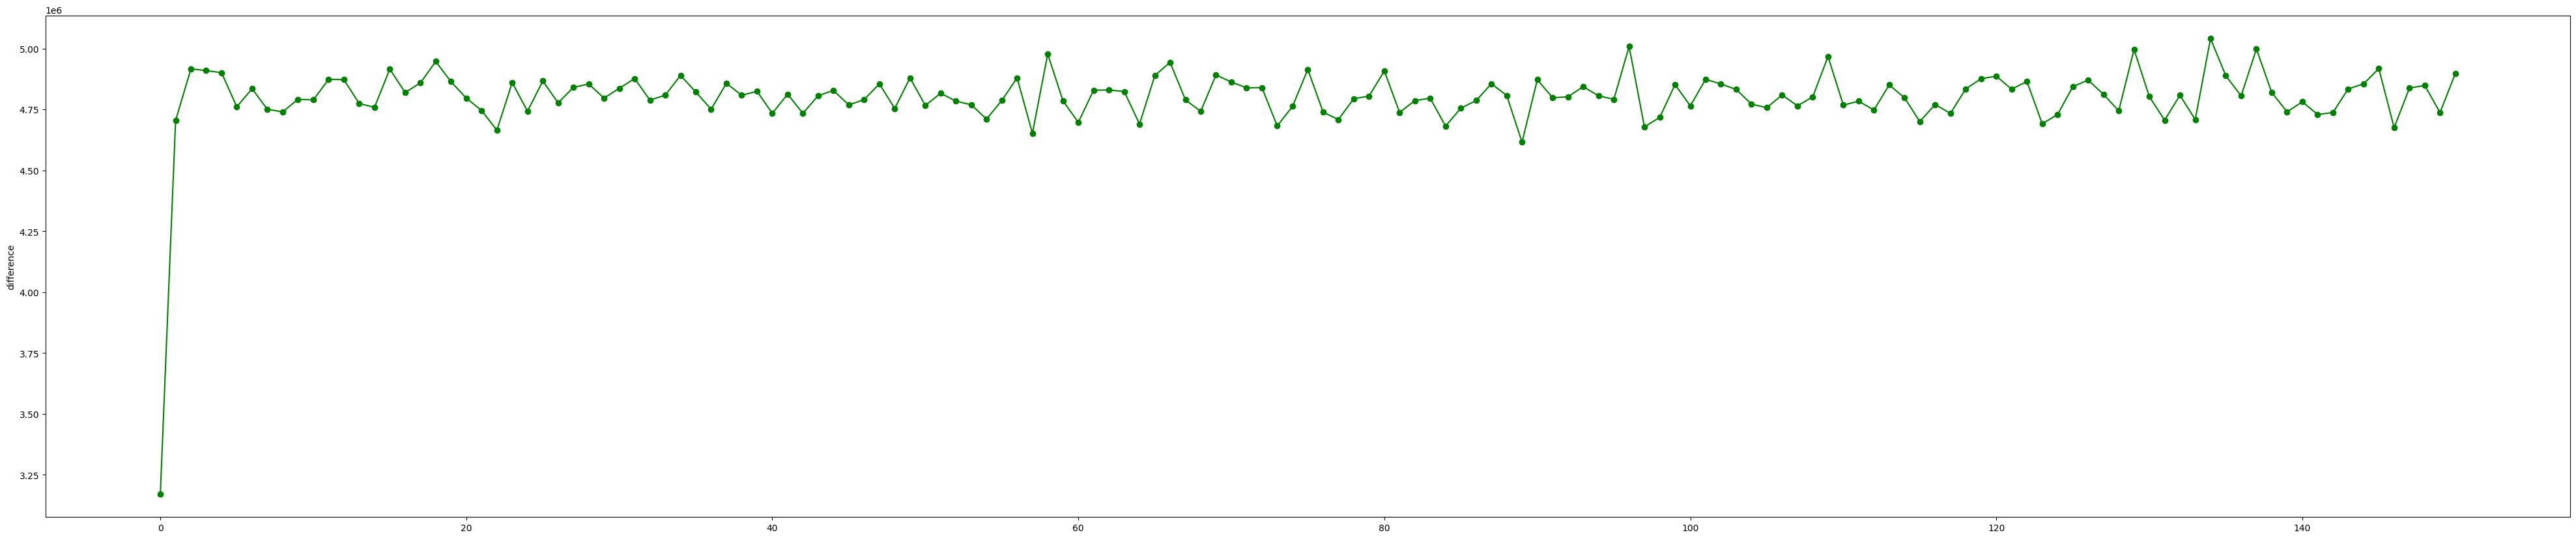

In [864]:
plt.figure(figsize=(50, 10))
plt.plot(thres,marker='o',linestyle='-',color='green')
plt.ylabel('difference')
plt.show()

In [865]:
threshold = int(sum(thres) / len(thres))

for account in df['AccountID'].unique():
    for day in df['Day'].unique():
        temp = df[(df['AccountID'] == account) & (df['Day'] == day)]['Amount']
        if temp.sum() > 1.5 * threshold:
            for index, rows in temp.iteritems():
                data.loc[index, 'status'] = 1


In [866]:
data

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,status
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,1.0
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,1.0
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,1.0
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London,1.0
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,1.0
...,...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco,NaN
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London,NaN
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London,NaN
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York,NaN


In [867]:
# data.to_csv('output_file.csv', index=False)

# Data Pre-Processing

In [868]:
data.fillna(0,inplace=True)

In [869]:
data.isnull().sum()

Timestamp          0
TransactionID      0
AccountID          0
Amount             0
Merchant           0
TransactionType    0
Location           0
status             0
dtype: int64

In [870]:
data['status'].value_counts()

0.0    216799
1.0       161
Name: status, dtype: int64

In [871]:
X = data.drop(columns=['status'])
y = data['status']

### Handling categorical values

In [875]:
for index, row in X.iterrows():
    Timestamp = X.loc[index, 'Timestamp']
    X.loc[index, 'Date'] = Timestamp[0:2]
    X.loc[index, 'Month'] = Timestamp[3:5]
    X.loc[index, 'Year'] = Timestamp[6:11]
    X.loc[index, 'Time'] = Timestamp[11:]

In [876]:
X.drop(columns=['TransactionID', 'Timestamp','Time', 'Year', 'Date', 'Month'],axis=1, inplace=True)

In [877]:
X = pd.get_dummies(X, columns=['AccountID', 'Merchant', 'TransactionType', 'Location'])

### Standardization of numerical feature

In [878]:
X_min = df['Amount'].min()
X_max = df['Amount'].max()

data['Amount'] = (data['Amount'] - X_min) / (X_max - X_min)

In [879]:
y.value_counts()

0.0    216799
1.0       161
Name: status, dtype: int64

### Oversampling

In [881]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=42)

X, y = oversampler.fit_resample(X, y)

In [883]:
y.value_counts()

1.0    216799
0.0    216799
Name: status, dtype: int64

### Principal Component Analysis (PCA)

In [897]:
from sklearn.decomposition import PCA

In [898]:
pca = PCA(n_components=3)

pca.fit(X)

t_df = pca.transform(X)

In [899]:
t_df = {'pc1':t_df[:,0],
        'pc2':t_df[:,1],
        'pc3':t_df[:,2],}


t_df = pd.DataFrame(t_df)

In [900]:
t_df['status'] = y

In [901]:
t_df

,pc1,pc2,pc3,status
0,31084.768040,0.758446,-0.007042,1.0
1,-48379.261960,0.771078,0.025817,1.0
2,1105.188040,-0.462037,-0.671296,1.0
3,-63899.281960,0.761988,0.031878,1.0
4,-63270.591960,0.763321,-0.012107,1.0
...,...,...,...,...
433593,32734.205974,-0.046811,0.006961,1.0
433594,-31148.617214,-0.445997,-0.724098,1.0
433595,-13593.377617,-0.066615,0.038707,1.0
433596,-37102.427077,-0.064766,0.036454,1.0


In [903]:
t_df['status'].value_counts()

1.0    216799
0.0    216799
Name: status, dtype: int64

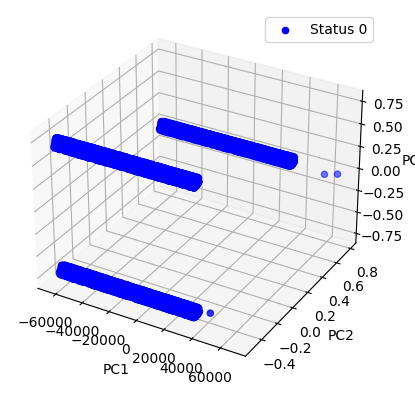

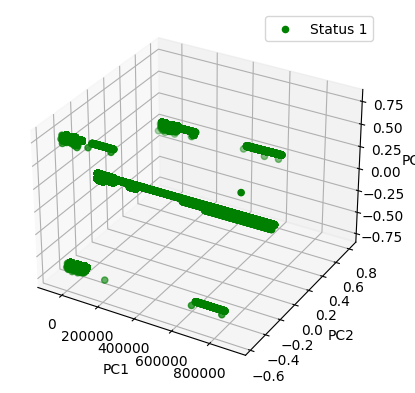

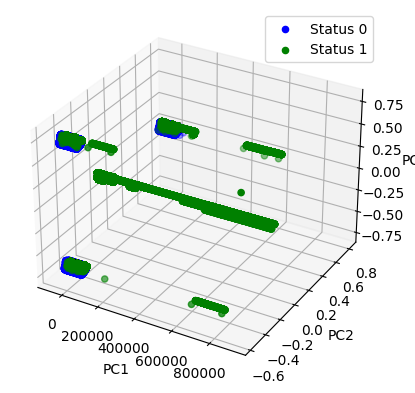

In [908]:
x_1 = t_df.loc[t_df['status'] == 0, 'pc1']
y_1 = t_df.loc[t_df['status'] == 0, 'pc2']
z_1 = t_df.loc[t_df['status'] == 0, 'pc3']

x_2 = t_df.loc[t_df['status'] == 1, 'pc1']
y_2 = t_df.loc[t_df['status'] == 1, 'pc2']
z_2 = t_df.loc[t_df['status'] == 1, 'pc3']


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x_1, y_1, z_1, c='blue', marker='o', label='Status 0')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_2, y_2, z_2, c='green', marker='o', label='Status 1')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_1, y_1, z_1, c='blue', marker='o', label='Status 0')
ax.scatter(x_2, y_2, z_2, c='green', marker='o', label='Status 1')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

# Modelling

In [889]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [890]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [891]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)

In [892]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [893]:
y_pred = model.predict(X_test)

## Accuracy

In [894]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [895]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9995848708487085
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     43363
         1.0       1.00      1.00      1.00     43357

    accuracy                           1.00     86720
   macro avg       1.00      1.00      1.00     86720
weighted avg       1.00      1.00      1.00     86720

